In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('worldbank.csv')

In [5]:
df

year  Population  Population growth  Surface area  \
0   1960   180671000           1.701993             0   
1   1961   183691000           1.657730       9629090   
2   1962   186538000           1.537997       9629090   
3   1963   189242000           1.439165       9629090   
4   1964   191889000           1.389046       9629090   
5   1965   194303000           1.250172       9629090   
6   1966   196560000           1.154893       9629090   
7   1967   198712000           1.088881       9629090   
8   1968   200706000           0.998461       9629090   
9   1969   202677000           0.977243       9629090   
10  1970   205052000           1.165003       9629090   
11  1971   207661000           1.264334       9629090   
12  1972   209896000           1.070523       9629090   
13  1973   211909000           0.954477       9629090   
14  1974   213854000           0.913660       9629090   
15  1975   215973000           0.985986       9629090   
16  1976   218035000           0.950220       9629090   
17  1977   220239000           1.005772       9629090   
18  1978   222585000           1.059573       9629090   
19  1979   225055000           1.103577       9629090   
20  1980   227225000           0.959590       9629090   
21  1981   229466000           0.981415       9629090   
22  1982   231664000           0.953318       9629090   
23  1983   233792000           0.914379       9629090   
24  1984   235825000           0.865817       9629090   
25  1985   237924000           0.886129       9629090   
26  1986   240133000           0.924164       9629090   
27  1987   242289000           0.893829       9629090   
28  1988   244499000           0.907999       9629090   
29  1989   246819000           0.944406       9629090   
30  1990   249623000           1.129651       9629090   
31  1991   252981000           1.336261       9629090   
32  1992   256514000           1.386886       9629090   
33  1993   259919000           1.318680       9629090   
34  1994   263126000           1.226296       9629090   
35  1995   266278000           1.190787       9629090   
36  1996   269394000           1.163412       9629090   
37  1997   272657000           1.203960       9629090   
38  1998   275854000           1.165715       9629090   
39  1999   279040000           1.148340       9629090   
40  2000   282162411           1.112769       9632030   
41  2001   284968955           0.989741       9632030   
42  2002   287625193           0.927797       9632030   
43  2003   290107933           0.859482       9632030   
44  2004   292805298           0.925484       9632030   
45  2005   295516599           0.921713       9632030   
46  2006   298379912           0.964254       9632030   
47  2007   301231207           0.951055       9632030   
48  2008   304093966           0.945865       9831510   
49  2009   306771529           0.876651       9831510   
50  2010   309348193           0.836422       9831510   
51  2011   311663358           0.745614       9831510   
52  2012   313998379           0.746420       9831510   
53  2013   316204908           0.700262       9831510   
54  2014   318563456           0.743124       9831510   
55  2015   320896618           0.729732       9831510   
56  2016   323127513           0.692801       9831510   
57  2017           0           0.000000       9831510   

    GNI per capita_Atlas method  GNI per capita_PPP  \
0                             0                   0   
1                             0                   0   
2                          3280                   0   
3                          3410                   0   
4                          3610                   0   
5                          3880                   0   
6                          4190                   0   
7                          4370                   0   
8                          4740                   0   
9                          5070                   0   
10                         5360    

In [12]:
import pandas as pd
import argparse
import numpy as np
from influxdb import InfluxDBClient

#print(brics)
def read_data():
    with open('worldbank.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[1:]]
def read_header():
    with open('worldbank.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[:1]]

def main(host='localhost', port=8086):       #input your port number which has been set for influx
    """Instantiate the connection to the InfluxDB client."""
    user = 'admin'
    password = 'admin'
    dbname = 'worldbankdb'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'

    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create DataFrame");
    b=read_header();
    arr = np.array([b]);
    print(arr)
    narr=np.delete(arr,0) # remove the date column
    print(narr)
    length=len(narr);
    print(narr); # getting /n (new line?,why?)
    narr[length-1]=narr[length-1].replace("\n",""); 
    print(narr); #removed /n
    a=read_data()
    print(narr); #removed /n
    print("Create database: " + dbname)
    client.create_database(dbname)
    j=0;
    for i in range(len(narr)):
        j=j+1;
        date=1960
        for metric in a:
            metric[j]=metric[j].replace("\n",""); # same as line 31
            narr[i]
            print(narr[i],metric[j],str(date)+"-12-31"+"T00:00:00Z")
            influx_metric = [{
                'measurement': 'worldbank', #name of the table 
                'tags': {
                    'items': narr[i]#name of column
                },
                'time': str(date)+"-12-31"+"T00:00:00Z",
                'fields': {
                    'value': metric[j] #value of field
                }
            }]
            client.write_points(influx_metric)
            date=date+1;

main()

Create DataFrame
[[['' 'Population' 'Population growth' 'Surface area'
   'GNI per capita_Atlas method' 'GNI per capita_PPP'
   'Life expectancy at birth_total' 'Fertility rate_total '
   'Adolescent fertility rate ' 'Contraceptive prevalence_ any methods'
   'Births attended by skilled health staff' 'Mortality rate_under-5 '
   'Prevalence of underweight_weight for age' 'Immunization_measles '
   'School enrollment_secondary ' 'School enrollment_primary and secondary'
   'Forest area' 'Water productivity_total' 'Improved water source '
   'Improved sanitation facilities' 'Energy use '
   'CO2 emissions (metric tons per capita)'
   'Electric power consumption (kWh per capita)' 'GDP growth (annual %)'
   'Inflation_GDP deflator (annual %)' 'Agriculture_value added (% of GDP)'
   'Industry_value added (% of GDP)' 'Services_value added (% of GDP)'
   'Exports of goods and services (% of GDP)'
   'Imports of goods and services (% of GDP)'
   'Gross capital formation (% of GDP)'
   'Revenue

In [7]:
df2 = pd.read_csv('internet.csv')

In [9]:
df2

year  percentage
0   2015   74.550000
1   2014   73.000000
2   2013   71.400000
3   2012   74.700000
4   2011   69.729461
5   2010   71.690000
6   2009   71.000000
7   2008   74.000000
8   2007   75.000000
9   2006   68.931193
10  2005   67.968053
11  2004   64.758256
12  2003   61.697117
13  2002   58.785404
14  2001   49.080832
15  2000   43.079163
16  1999   35.848724
17  1998   30.093197
18  1997   21.616401
19  1996   16.419353
20  1995    9.237088
21  1994    4.862781
22  1993    2.271673
23  1992    1.724203
24  1991    1.163194
25  1990    0.784729

###### import pandas as pd
import argparse
import numpy as np
from influxdb import InfluxDBClient

#print(brics)
def read_data():
    with open('internet.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[1:]]
def read_header():
    with open('internet.csv') as f: #Input the name of your csv file here
        return [x.split(',') for x in f.readlines()[:1]]

def main(host='localhost', port=8086):       #input your port number which has been set for influx
    """Instantiate the connection to the InfluxDB client."""
    user = 'admin'
    password = 'admin'
    dbname = 'internet'
    # Temporarily avoid line protocol time conversion issues #412, #426, #431.
    protocol = 'json'

    client = InfluxDBClient(host, port, user, password, dbname)

    print("Create DataFrame");
    b=read_header();
    arr = np.array([b]);
    print(arr)
    narr=np.delete(arr,0) # remove the date column
    print(narr)
    length=len(narr);
    print(narr); # getting /n (new line?,why?)
    narr[length-1]=narr[length-1].replace("\n",""); 
    print(narr); #removed /n
    a=read_data()
    print(narr); #removed /n
    print("Create database: " + dbname)
    client.create_database(dbname)
    j=0;
    for i in range(len(narr)):
        j=j+1;
        for metric in a:
            date=1990
            metric[j]=metric[j].replace("\n",""); # same as line 31
            narr[i]
            print(narr[i],metric[j],str(date)+"-12-31"+"T00:00:00Z")
            influx_metric = [{
                'measurement': 'internet', #name of the table 
                'tags': {
                    'items': narr[i]#name of column
                },
                'time': str(date)+"-12-31"+"T00:00:00Z",
                'fields': {
                    'value': metric[j] #value of field
                }
            }]
            client.write_points(influx_metric)
            date=date+1;

main()

In [10]:
internet_worldbank=pd.merge(df,df2,on='year',how='outer')

In [11]:
internet_worldbank=internet_worldbank.dropna(axis=0)
internet_worldbank

year  Population  Population growth  Surface area  \
30  1990   249623000           1.129651       9629090   
31  1991   252981000           1.336261       9629090   
32  1992   256514000           1.386886       9629090   
33  1993   259919000           1.318680       9629090   
34  1994   263126000           1.226296       9629090   
35  1995   266278000           1.190787       9629090   
36  1996   269394000           1.163412       9629090   
37  1997   272657000           1.203960       9629090   
38  1998   275854000           1.165715       9629090   
39  1999   279040000           1.148340       9629090   
40  2000   282162411           1.112769       9632030   
41  2001   284968955           0.989741       9632030   
42  2002   287625193           0.927797       9632030   
43  2003   290107933           0.859482       9632030   
44  2004   292805298           0.925484       9632030   
45  2005   295516599           0.921713       9632030   
46  2006   298379912           0.964254       9632030   
47  2007   301231207           0.951055       9632030   
48  2008   304093966           0.945865       9831510   
49  2009   306771529           0.876651       9831510   
50  2010   309348193           0.836422       9831510   
51  2011   311663358           0.745614       9831510   
52  2012   313998379           0.746420       9831510   
53  2013   316204908           0.700262       9831510   
54  2014   318563456           0.743124       9831510   
55  2015   320896618           0.729732       9831510   

    GNI per capita_Atlas method  GNI per capita_PPP  \
30                        24150               23730   
31                        24370               24180   
32                        25780               25180   
33                        26480               26000   
34                        27750               27350   
35                        29150               28550   
36                        30380               29980   
37                        31390               31620   
38                        32150               33230   
39                        33780               34850   
40                        36070               36930   
41                        36840               37860   
42                        37470               38590   
43                        39950               39960   
44                        43680               42260   
45                        46340               44740   
46                        48080               47390   
47                        48640               48420   
48                        49330               48640   
49                        48050               47250   
50                        48950               48880   
51                        50460               50710   
52                        52540               52850   
53                        53660               54000   
54                        55350               56160   
55                        56250               57900   

    Life expectancy at birth_total  Fertility rate_total   \
30                       75.214634                 2.0810   
31                       75.365854                 2.0625   
32                       75.617073                 2.0460   
33                       75.419512                 2.0195   
34                       75.619512                 2.0015   
35                       75.621951                 1.9780   
36                       76.026829                 1.9760   
37                       76.429268                 1.9710   
38                       76.580488                 1.9990   
39                       76.582927                 2.0075   
40                       76.636585                 2.0560   
41                       76.836585                 2.0305   
42                       76.936585                 2.0205   
43                       77.036585                 2.0475   
44                       77.487805                 2.0515   
45

In [12]:
internet_worldbank = internet_worldbank.reset_index(drop=True)

In [13]:
len(internet_worldbank)

26

In [14]:
internet_worldbank

year  Population  Population growth  Surface area  \
0   1990   249623000           1.129651       9629090   
1   1991   252981000           1.336261       9629090   
2   1992   256514000           1.386886       9629090   
3   1993   259919000           1.318680       9629090   
4   1994   263126000           1.226296       9629090   
5   1995   266278000           1.190787       9629090   
6   1996   269394000           1.163412       9629090   
7   1997   272657000           1.203960       9629090   
8   1998   275854000           1.165715       9629090   
9   1999   279040000           1.148340       9629090   
10  2000   282162411           1.112769       9632030   
11  2001   284968955           0.989741       9632030   
12  2002   287625193           0.927797       9632030   
13  2003   290107933           0.859482       9632030   
14  2004   292805298           0.925484       9632030   
15  2005   295516599           0.921713       9632030   
16  2006   298379912           0.964254       9632030   
17  2007   301231207           0.951055       9632030   
18  2008   304093966           0.945865       9831510   
19  2009   306771529           0.876651       9831510   
20  2010   309348193           0.836422       9831510   
21  2011   311663358           0.745614       9831510   
22  2012   313998379           0.746420       9831510   
23  2013   316204908           0.700262       9831510   
24  2014   318563456           0.743124       9831510   
25  2015   320896618           0.729732       9831510   

    GNI per capita_Atlas method  GNI per capita_PPP  \
0                         24150               23730   
1                         24370               24180   
2                         25780               25180   
3                         26480               26000   
4                         27750               27350   
5                         29150               28550   
6                         30380               29980   
7                         31390               31620   
8                         32150               33230   
9                         33780               34850   
10                        36070               36930   
11                        36840               37860   
12                        37470               38590   
13                        39950               39960   
14                        43680               42260   
15                        46340               44740   
16                        48080               47390   
17                        48640               48420   
18                        49330               48640   
19                        48050               47250   
20                        48950               48880   
21                        50460               50710   
22                        52540               52850   
23                        53660               54000   
24                        55350               56160   
25                        56250               57900   

    Life expectancy at birth_total  Fertility rate_total   \
0                        75.214634                 2.0810   
1                        75.365854                 2.0625   
2                        75.617073                 2.0460   
3                        75.419512                 2.0195   
4                        75.619512                 2.0015   
5                        75.621951                 1.9780   
6                        76.026829                 1.9760   
7                        76.429268                 1.9710   
8                        76.580488                 1.9990   
9                        76.582927                 2.0075   
10                       76.636585                 2.0560   
11                       76.836585                 2.0305   
12                       76.936585                 2.0205   
13                       77.036585                 2.0475   
14                       77.487805                 2.0515   
15

In [38]:
import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sb
from pylab import rcParams

In [39]:
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets

In [40]:
rcParams['figure.figsize']= 26,42
sb.set_style('whitegrid')

In [34]:
for i in range(0,len(internet_worldbank)):
    internet_worldbank[i][0]=float(internet_worldbank[i])
    #change into float?

In [41]:
internet_worldbank

year  Population  Population growth  Surface area  \
0   1990   249623000           1.129651       9629090   
1   1991   252981000           1.336261       9629090   
2   1992   256514000           1.386886       9629090   
3   1993   259919000           1.318680       9629090   
4   1994   263126000           1.226296       9629090   
5   1995   266278000           1.190787       9629090   
6   1996   269394000           1.163412       9629090   
7   1997   272657000           1.203960       9629090   
8   1998   275854000           1.165715       9629090   
9   1999   279040000           1.148340       9629090   
10  2000   282162411           1.112769       9632030   
11  2001   284968955           0.989741       9632030   
12  2002   287625193           0.927797       9632030   
13  2003   290107933           0.859482       9632030   
14  2004   292805298           0.925484       9632030   
15  2005   295516599           0.921713       9632030   
16  2006   298379912           0.964254       9632030   
17  2007   301231207           0.951055       9632030   
18  2008   304093966           0.945865       9831510   
19  2009   306771529           0.876651       9831510   
20  2010   309348193           0.836422       9831510   
21  2011   311663358           0.745614       9831510   
22  2012   313998379           0.746420       9831510   
23  2013   316204908           0.700262       9831510   
24  2014   318563456           0.743124       9831510   
25  2015   320896618           0.729732       9831510   

    GNI per capita_Atlas method  GNI per capita_PPP  \
0                         24150               23730   
1                         24370               24180   
2                         25780               25180   
3                         26480               26000   
4                         27750               27350   
5                         29150               28550   
6                         30380               29980   
7                         31390               31620   
8                         32150               33230   
9                         33780               34850   
10                        36070               36930   
11                        36840               37860   
12                        37470               38590   
13                        39950               39960   
14                        43680               42260   
15                        46340               44740   
16                        48080               47390   
17                        48640               48420   
18                        49330               48640   
19                        48050               47250   
20                        48950               48880   
21                        50460               50710   
22                        52540               52850   
23                        53660               54000   
24                        55350               56160   
25                        56250               57900   

    Life expectancy at birth_total  Fertility rate_total   \
0                        75.214634                 2.0810   
1                        75.365854                 2.0625   
2                        75.617073                 2.0460   
3                        75.419512                 2.0195   
4                        75.619512                 2.0015   
5                        75.621951                 1.9780   
6                        76.026829                 1.9760   
7                        76.429268                 1.9710   
8                        76.580488                 1.9990   
9                        76.582927                 2.0075   
10                       76.636585                 2.0560   
11                       76.836585                 2.0305   
12                       76.936585                 2.0205   
13                       77.036585                 2.0475   
14                       77.487805                 2.0515   
15

In [42]:
pca=decomposition.PCA()
internet_worldbank= pca.fit_transform(internet_worldbank)

In [44]:
pca.explained_variance_ratio_[0]

0.98863005854388963

In [45]:
pca.explained_variance_ratio_

array([  9.88630059e-01,   1.13627851e-02,   7.08609900e-06,
         5.21336054e-08,   1.11313748e-08,   6.50263972e-09,
         4.15637212e-10,   4.82335045e-11,   6.07812485e-12,
         1.60181013e-12,   4.90603088e-13,   2.25490500e-13,
         1.83915879e-13,   7.24644280e-14,   1.40714903e-14,
         4.44115493e-15,   4.17717506e-15,   1.71010153e-15,
         7.68794849e-16,   6.30077291e-16,   2.49140714e-16,
         2.32647186e-16,   1.25851351e-16,   3.22521187e-17,
         1.31892719e-17,   1.50881205e-32])

In [47]:
components= pd.DataFrame(pca.components_)

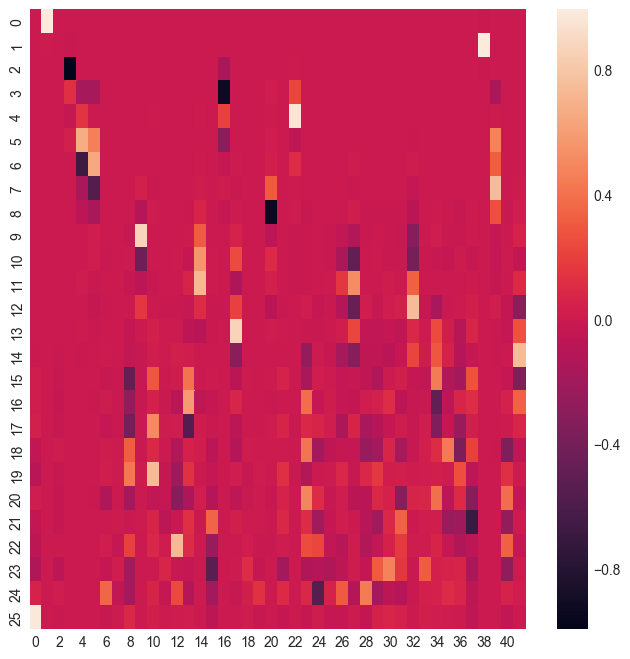

In [48]:
import matplotlib.pyplot as plt
sb.heatmap(components)
plt.show()